## Mount the google drive and then change the current directory

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sys

# PROJECT_PATH = '/content/' # for google colab
PROJECT_PATH = '../' # for local run
DATASET_DIR = os.path.join(PROJECT_PATH,'DATA')
AVA_DATASET_DIR = os.path.join(DATASET_DIR, 'ava')

sys.path.append(PROJECT_PATH)
import nima as nima

In [4]:
from nima.model.loss import earth_movers_distance
from nima.utils.ava_dataset_utils import get_ava_csv_df, get_rating_columns, get_ava_csv_score_df
ratings_column = get_rating_columns()

In [5]:
# ava_csv_df = get_ava_csv_score_df()
# ava_csv_df.head(10)
ava_csv_df.to_csv('../data/ava/ava_with_scores.csv', index=False)

index image_id  max_rating  mean_score  std_score  count_rating_1  \
0      1   953619           4       5.637      4.071               0   
1      2   953958           3       4.698      5.781              10   
2      3   954184           5       5.675      2.825               0   
3      4   954113           4       5.773      3.695               0   
4      5   953980           4       5.209      3.339               0   
5      6   954175           5       5.600      3.176               0   
6      7   953349           5       6.102      3.684               1   
7      8   953645           5       6.008      2.747               0   
8      9   953897           5       6.523      3.163               0   
9     10   953841           5       5.984      3.469               0   

   count_rating_2  count_rating_3  count_rating_4  count_rating_5  \
0               1               5              17              38   
1               7              15              26              26   
2               0               4               8              41   
3               1               4               6              48   
4               3               6              15              57   
5               0               5              13              40   
6               1               1               7              27   
7               0               0               8              33   
8               0               0               5              19   
9               0               3               8              37   

   count_rating_6  count_rating_7  count_rating_8  count_rating_9  \
0              36              15               6               5   
1              21              10               8               1   
2              56              10               3               4   
3              37              23               5               2   
4              39               6               1               1   
5              53              14               1               3   
6              46              28              13               4   
7              51              27               3               3   
8              46              29              22               5   
9              44              22               9               4   

   count_rating_10  tag_1  tag_2  challange_id  
0                1      1     22          1396  
1                2      1     21          1396  
2                0      0      0          1396  
3                2     15     21          1396  
4                1     22     38          1396  
5                1     15     65          1396  
6                0     16     21          1396  
7                2      0      0          1396  
8                2      7     14          1396  
9                2     14     53          1396

In [125]:
ava_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            15084 non-null  int64  
 1   image_id         15084 non-null  object 
 2   max_rating       15084 non-null  int64  
 3   mean_score       15084 non-null  float64
 4   std_score        15084 non-null  float64
 5   count_rating_1   15084 non-null  int64  
 6   count_rating_2   15084 non-null  int64  
 7   count_rating_3   15084 non-null  int64  
 8   count_rating_4   15084 non-null  int64  
 9   count_rating_5   15084 non-null  int64  
 10  count_rating_6   15084 non-null  int64  
 11  count_rating_7   15084 non-null  int64  
 12  count_rating_8   15084 non-null  int64  
 13  count_rating_9   15084 non-null  int64  
 14  count_rating_10  15084 non-null  int64  
 15  tag_1            15084 non-null  int64  
 16  tag_2            15084 non-null  int64  
 17  challange_id

In [41]:
columns = ['image_id', 'max_rating', 'mean_score', 'std_score'] + ratings_column
df = ava_csv_df[columns][:1]
ava_csv_df[ratings_column].describe()

count_rating_1  count_rating_2  count_rating_3  count_rating_4  \
count    15084.000000    15084.000000    15084.000000    15084.000000   
mean         3.466322        7.856338       19.770220       44.368470   
std          7.046252        9.032490       15.766474       24.257123   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        2.000000        8.000000       25.000000   
50%          1.000000        5.000000       16.000000       42.000000   
75%          4.000000       10.000000       28.000000       61.000000   
max        195.000000       85.000000       99.000000      138.000000   

       count_rating_5  count_rating_6  count_rating_7  count_rating_8  \
count    15084.000000    15084.000000    15084.000000    15084.000000   
mean        66.548793       48.346592       26.615089       13.471029   
std         24.313671       21.125257       17.147130       12.162872   
min          2.000000        0.000000        0.000000        0.000000   
25%         50.000000       32.000000       14.000000        5.000000   
50%         67.000000       48.000000       23.000000       10.000000   
75%         84.000000       62.000000       37.000000       19.000000   
max        151.000000      130.000000      120.000000      119.000000   

       count_rating_9  count_rating_10  
count    15084.000000     15084.000000  
mean         5.689340         3.412755  
std          6.919452         5.138641  
min          0.000000         0.000000  
25%          1.000000         1.000000  
50%          3.000000         2.000000  
75%          7.000000         4.000000  
max         93.000000       109.000000

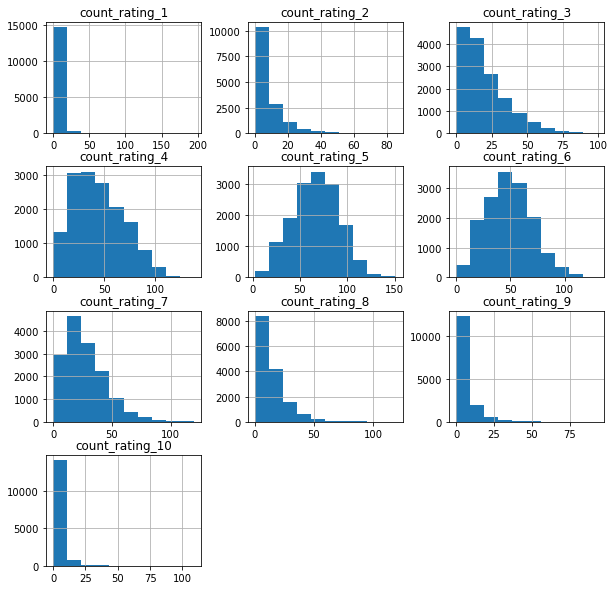

In [45]:
_ = ava_csv_df[ratings_column].hist(figsize=(10, 10))

### Check the mean score distribution

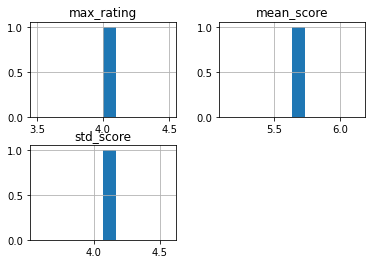

In [42]:
_ = df[['max_rating','mean_score', 'std_score']].hist()

## Test the logic for mean and std

In [37]:
def mean_quality_score(arr):
    # print(weights.shape, arr.shape)
    normalized = arr/arr.sum()
    # print(normalized)
    return np.sum(np.arange(1, 11)*normalized)

ava_rating_weights = np.arange(1,11)
def std_score(np_arr):
    mean = get_mean_quality_score(np_arr)
    s = ava_rating_weights
    s = np.square(s-mean_score) * (np_arr/np_arr.sum())
    return np.sqrt(s).sum()

from nima.utils.ava_dataset_utils import get_max_rating, get_mean_quality_score, get_std_score

# score = mean_quality_score(np.random.randint(10))
# score
value = df[ratings_column].iloc[0].to_numpy()
print(value)
sum = value.sum()
avg = value.mean()
std = value.std()
print(f"sum : {sum}, mean : {avg}, std : {std:.3f}")

mean_score = get_mean_quality_score(value)
std_score = std_score(value)

# print(value)
print(f"mean_quality_score : {mean_score}, std : {std_score}")

[ 0  1  5 17 38 36 15  6  5  1]
sum : 124, mean : 12.4, std : 13.433
mean_quality_score : 5.637096774193549, std : 4.071426534211207


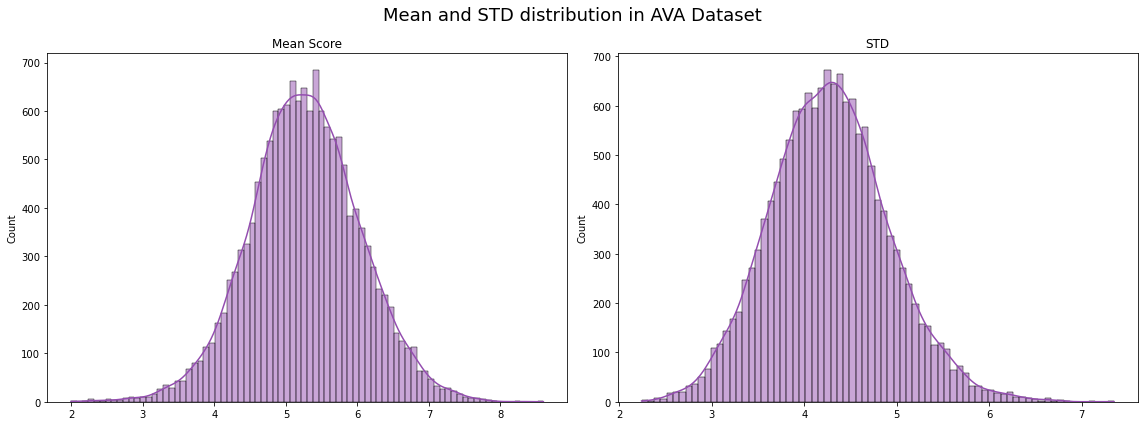

In [88]:
plot_color = '#944eb0'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(16, 6))
fig.suptitle('Mean and STD distribution in AVA Dataset', size=18)

sns.histplot(data=ava_csv_df['mean_score'], kde=True, color=plot_color, ax=ax1)
ax1.set_title('Mean Score')
ax1.set_xlabel('')
sns.histplot(data=ava_csv_df['std_score'], kde=True, color=plot_color, ax=ax2)
ax2.set_title('STD')
ax2.set_xlabel('')

plt.tight_layout()
plt.savefig('../project-snaps/mean_std_dist.png',
            edgecolor='black', facecolor='white')


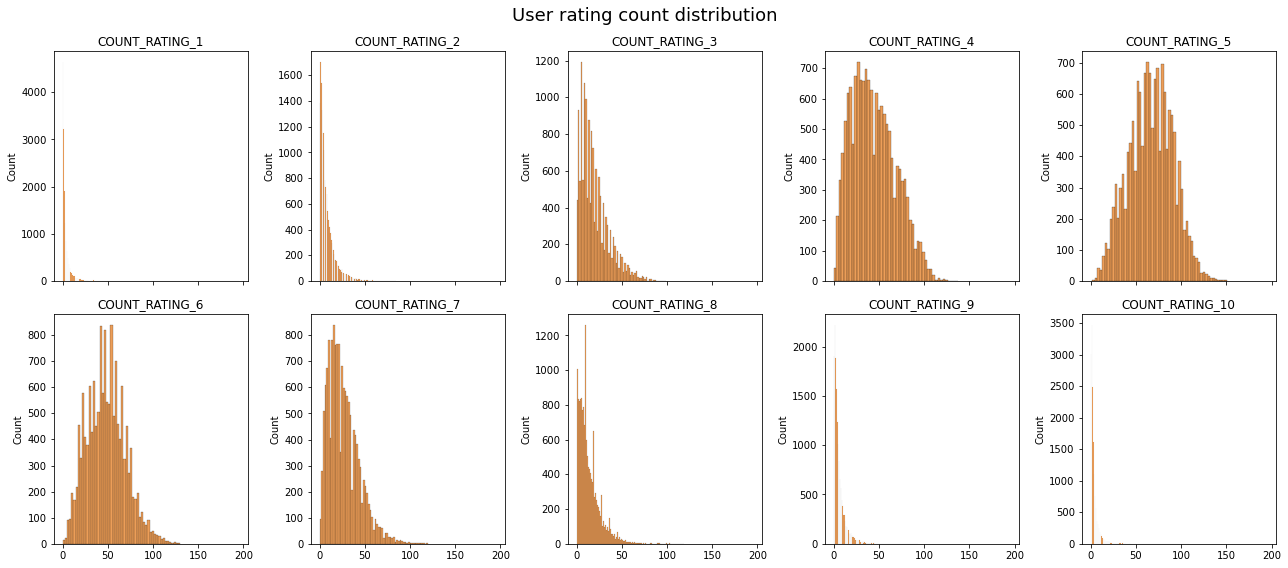

In [86]:
# plot_color = '#51a7e0'
plot_color = '#e67e22'
fig, axes = plt.subplots(2, 5,  figsize=(18,8), sharex=True)
fig.suptitle('User rating count distribution', size=18)

for i in range(10):
    row, col = i//5, i % 5
    ax = axes[row][col]
    column = f'count_rating_{i+1}'
    sns.histplot(data=ava_csv_df[column], ax=ax, color=plot_color)
    ax.set_title(column.upper())
    ax.set_xlabel('')

plt.tight_layout()
plt.savefig('../project-snaps/user_count_dist.png', edgecolor='black', facecolor='white')


### TID dataset 

3000


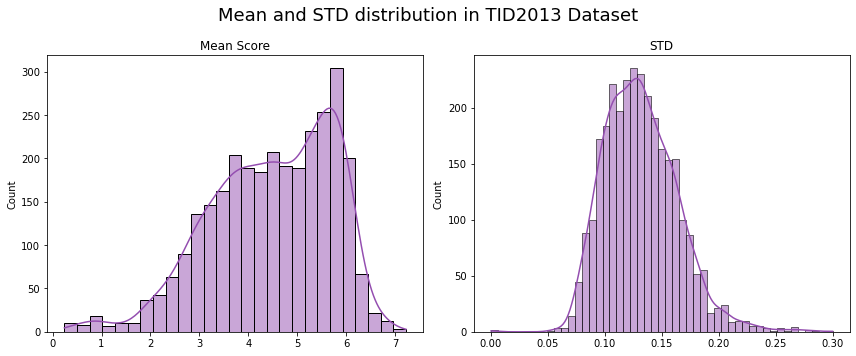

In [96]:
from nima.utils.tid_dataset_utils import get_mos_csv_df

mos_csv_df = get_mos_csv_df()
print(len(mos_csv_df))

plot_color = '#944eb0'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(12, 5))
fig.suptitle('Mean and STD distribution in TID2013 Dataset', size=18)

sns.histplot(data=mos_csv_df['mean'], kde=True, color=plot_color, ax=ax1)
ax1.set_title('Mean Score')
ax1.set_xlabel('')
sns.histplot(data=mos_csv_df['std'], kde=True, color=plot_color, ax=ax2)
ax2.set_title('STD')
ax2.set_xlabel('')

plt.tight_layout()
plt.savefig('../project-snaps/tid_mean_std_dist.png',
            edgecolor='black', facecolor='white')


## Testing the crop logic

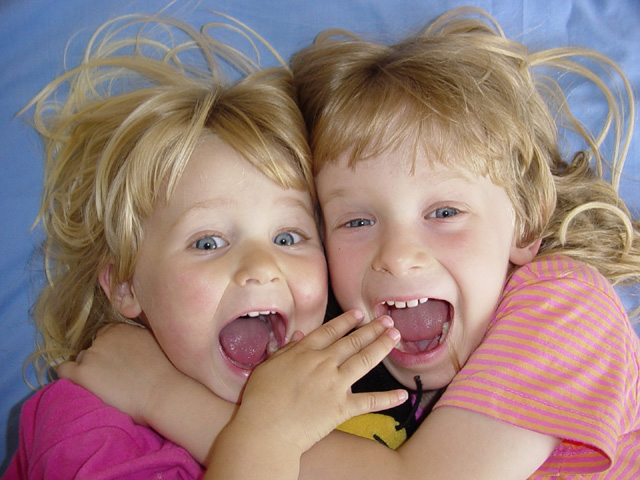

In [69]:
import tensorflow as tf
import PIL
from nima.utils import image_utils


image_file = os.path.join(AVA_DATASET_DIR, '10240.jpg')
crop_size=(224,224)
PIL.Image.open(image_file)

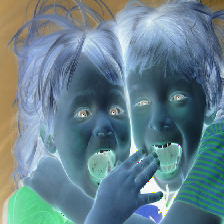

In [117]:
img = image_utils.load_image(image_file, (256, 256,  3))
# img = tf.convert_to_tensor(img)
img = tf.image.random_crop(img, size=(*crop_size, 3))
img = tf.image.random_flip_left_right(img)
img = np.array(img)*255

PIL.Image.fromarray(img.astype(np.uint8)).resize(crop_size)

(256, 256, 3)
(224, 224, 3)


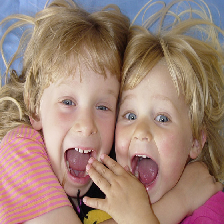

In [121]:
img = image_utils.load_image(image_file, (256, 256,  3))
print(img.shape)
img = image_utils.random_crop_image(img, crop_size)
if (np.random.random() > 0.5) and True: 
    img = np.fliplr(img)

print(img.shape)
PIL.Image.fromarray(img.astype(np.uint8))

## Randomly pick 10 images and print the score

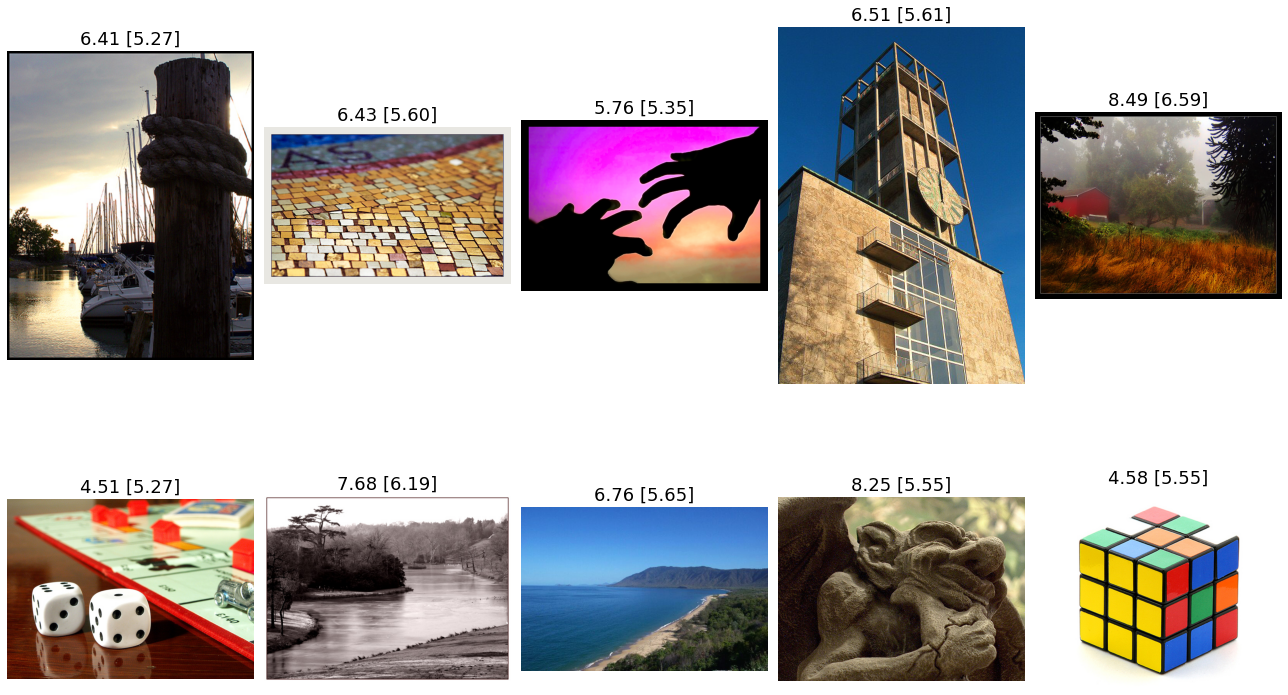

In [139]:
from nima.config import AVA_DATASET_IMAGES_DIR
import random

# index = np.random.randint(low=0, high=len(ava_csv_df), size=10  ).tolist()
# print(index)

# df_test=ava_csv_df.iloc[index]
# df_test


def show_images_with_score(df, img_dir):
    from PIL import Image
    plot_color = '#e67e22'
    fig, axes = plt.subplots(2, 5,  figsize=(18, 12))
    for i in range(10):
        row, col = i//5, i % 5
        ax = axes[row][col]
        ser = df.iloc[i]

        img_name = ser['image_id']
        mean_score = ser['mean_score']
        std_score = ser['std_score']

        random_score = random.uniform(mean_score-2, mean_score+2)
        # pred_mean_score = np
        img_path = os.path.join(img_dir, f"{img_name}.jpg")
        img = Image.open(img_path)
        # img = img.resize(224, 224)
        # ax.set_title(img_name)
        ax.set_title(f'{random_score:.2f} [{mean_score:.2f}]', size=18)
        ax.axis('off')
        # ax.set_xticks('')
        # ax.set_yticks('')
        ax.imshow(img, aspect='equal')

    plt.tight_layout()
    plt.savefig('../project-snaps/result-1.png',
                edgecolor='black', facecolor='white')


images_dir = AVA_DATASET_IMAGES_DIR
show_images_with_score(df_test, images_dir)
